In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
#from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv("data202.csv")

In [5]:
print(df.columns)

Index(['degree', 'water', 'plot', 'mitti', 'N', 'P', 'K', 'ph', 'plant',
       'pro'],
      dtype='object')


In [6]:
dum2 = pd.get_dummies(df['plot'])
dum3 = pd.get_dummies(df['mitti'])
dum4 = pd.get_dummies(df['plant'])

In [7]:
merg = pd.concat([df, dum2, dum3, dum4], axis='columns')
final = merg.drop(['plot', 'mitti', 'plant'], axis='columns')

In [8]:
final.fillna(final.mean(), inplace=True)

In [9]:
final.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

In [10]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(final.drop('pro', axis='columns'), final['pro'], test_size=0.3, random_state=42)

# model training and evaluation

In [12]:
# Calculate the accuracy (in this case, using mean squared error)
#mse = mean_squared_error(y_test, y_pred)
#accuracy = 1 - mse

#print(f"Accuracy: {accuracy}")

In [13]:
gradientregressor = GradientBoostingRegressor(max_depth=10,n_estimators=20,learning_rate=0.5)

In [14]:
#Train gradient boosting regressor
model=gradientregressor.fit(X_train , y_train)

In [15]:
y_pred = model.predict(X_test)

In [16]:
r2_score(y_pred,y_test)

0.9234455364170965

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#plot feature importance
feature_importance =  model.feature_importances_



NameError: name 'data202' is not defined

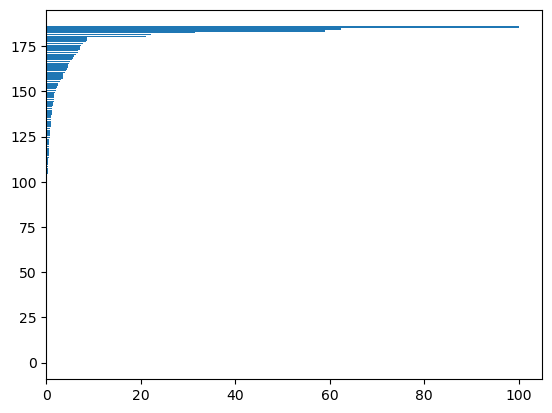

In [19]:
#make importances  relative to max importance
feature_importance =100.0*(feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,data202.feature_names[soretd_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

LR = {'learning_rate': [0.15, 0.1, 0.10, 0.5, 1.0], 'n_estimators': [5, 10, 15, 20, 25]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=LR, scoring="r2")

tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_


({'learning_rate': 0.5, 'n_estimators': 25}, 0.8003315502567061)

In [21]:
mse=mean_squared_error(y_test,y_pred)

In [22]:
print(mse)

425612.342733683


In [23]:
# Calculate the accuracy (in this case, using mean squared error)
mse = mean_squared_error(y_test, y_pred)
accuracy = 1 - mse

print(f"Accuracy: {accuracy}")

Accuracy: -425611.342733683


# Overall Assessment: While the MSE is relatively high, the high R2 score indicates that the model still performs well in explaining the variance in the data. It suggests that the model can make accurate predictions despite the presence of some prediction errors. However, it is important to note that the interpretation of MSE and R2 score also depends on the specific context and the range of the target variable. It is advisable to compare these metrics with baseline models or other evaluation metrics to gain a more comprehensive understanding of the model's performance.

In [24]:
# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
#print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 652.3897169128917
Mean Absolute Error (MAE): 379.3873333527465


# CALCULATION OF R2 SCORE

In [27]:
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9306031934992288


# calculation of adjusted r2 score

# where n is the number of samples and p is the number of features in the test set.

In [28]:
# Calculate the adjusted R2 score
n = len(X_test)  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adjusted_r2)

Adjusted R2 Score: 0.899574813669557


In [29]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 379.3873333527465


CALCULATION OF ACCUARCY


In [30]:
# Calculate the accuracy (optional for regression)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9306031934992288
